In [1]:
# !pip install bayesian-optimization
# !pip install iteration-utilities

In [2]:
# for development:
%load_ext autoreload
%autoreload 2

# standards:
import numpy as np
import pandas as pd

# graphics:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from cmcrameri import cm
import cmocean

import tqdm
# Fix global random state

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap


import networkx as nx

import dill as pickle      


# Set up games:

SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

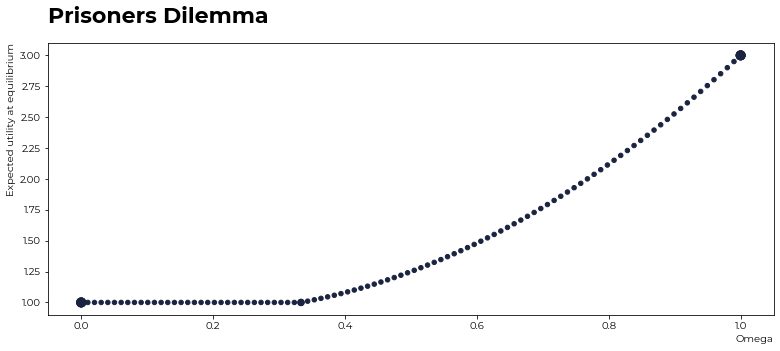

In [3]:
from simple_teams.game_structure import game, game_mixture

prisoners_dilemma = game(
    name="Prisoners Dilemma",
    n_players=2,
    n_choices=2,
    payoffs=[[3, 3], [-3, 4],[4, -3],  [1,1]],
#     payoffs=[[2, 3], [0, -6],[0, 2],  [1,1]],

    size=dict(width=700, height=170),
)

prisoners_dilemma.show_game()
prisoners_dilemma.set_up_TR_strategies(100)
prisoners_dilemma.plot_TR_utils(player=0,figsize=(13, 5))
# plt.savefig('instep/pd_utils.png',dpi=300,bbox_inches='tight')


SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

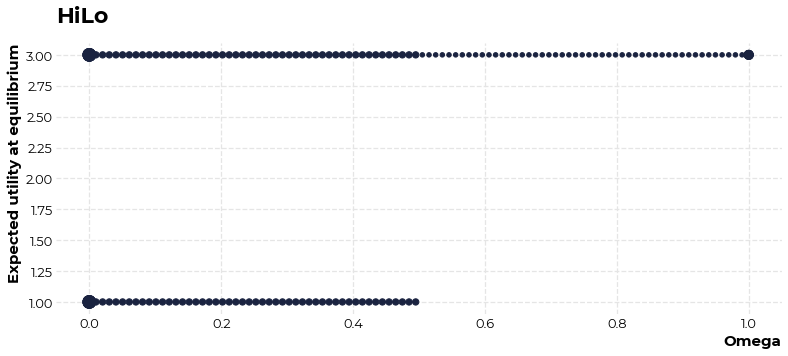

In [4]:

hilo = game(
    name="HiLo",
    n_players=2,
    n_choices=2,
    payoffs=[[3,3], [0,0], [0,0], [1,1]],
#     payoffs=[[2,1], [0,0], [0,0], [1,2]],

    size=dict(width=700, height=170),
)

hilo.show_game()

hilo.set_up_TR_strategies(100)
hilo.plot_TR_utils(player=1,figsize=(13, 5))
# plt.savefig('instep/hilo_utils.png',dpi=300,bbox_inches='tight')


In [5]:
my_game_mixture = game_mixture([[prisoners_dilemma,.5],
                                [hilo,0.5]])

# Set up network:

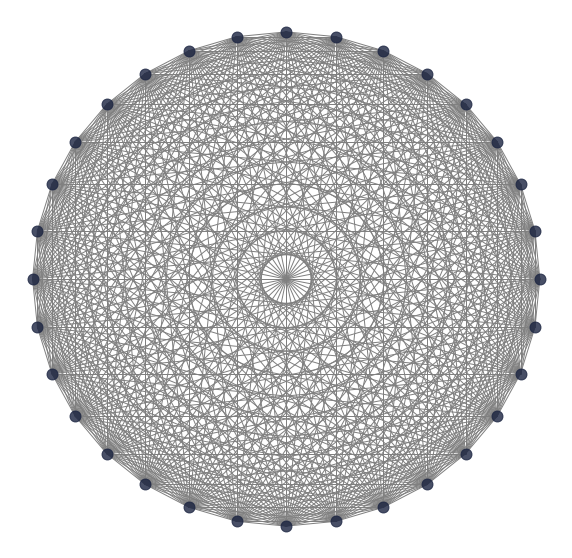

In [6]:
G = nx.complete_graph(32)

def ensure_graph_connectivity(G):
    for node in list(nx.isolates(G)):
        random_connection = node
        while random_connection == node:
            random_connection = np.random.randint(len(G.nodes()))
        G.add_edge(node,random_connection)
    return G

def plot_graph(G, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use("opinions.mplstyle")
    positions = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, positions, node_size=120, node_color="#1a2340", alpha=0.8)
    nx.draw_networkx_edges(G, positions, edge_color="grey", width=1, alpha=1)
    plt.axis('off')

G = ensure_graph_connectivity(G)
plot_graph(G)


# Run the model many times

<font color='red'>**Here we run into problems!!**</font>

In [ ]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        n=0
        while n<3: #dirty hack to avoid untracked error
#         for ix in range(0,3):
    #         G = nx.powerlaw_cluster_graph(32,1,0.01)
            try:
                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                pass
            
            
pickle.dump(model_list, open('instep/random_partition_simulations_pickle.pkl', 'wb')) 

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/21 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]